In [1]:
#import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

In [2]:
#get dataset from github
!git clone https://github.com/ifmankim/Data-Science----Sales-Analytic.git

Cloning into 'Data-Science----Sales-Analytic'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 2.52 MiB | 3.44 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
#read all csv file
files = [file for file in os.listdir('/content/Data-Science----Sales-Analytic/dataset')]
for file in files:
  print(file)

Sales_March_2019.csv
Sales_November_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv


In [4]:
#merging data
all_data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/Data-Science----Sales-Analytic/dataset/'+file)
  all_data = pd.concat([all_data, df])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [5]:
#save all data
all_data.to_csv('final_data.csv', index=False)

In [82]:
df = pd.read_csv('final_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [84]:
df.describe() #there is some issue, i think in our dataset after combining all csv, the merging included the header

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [85]:
#drop some unnecesarry value
df = df.drop(df[df['Order ID'] == 'Order ID'].index)

In [86]:
#change the column name for easily read
df.rename(columns={"Order ID": "order_id","Product":'product','Quantity Ordered':'quantity','Price Each':'price','Order Date':'order_date', 'Purchase Address':'address'}, inplace=True)

In [87]:
#clean data
null = df[df.isna().any(axis=1)]
null.head()

,order_id,product,quantity,price,order_date,address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN


Lest drop some null values data

In [88]:
df = df.dropna(how='all')
df

,order_id,product,quantity,price,order_date,address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [89]:
#change typedata
df['quantity'] = pd.to_numeric(df['quantity']) #change to numerical
df['price'] = pd.to_numeric(df['price']) #change to numerical
df['order_date'] = pd.to_datetime(df['order_date']) #change to datetime

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    185950 non-null  object        
 1   product     185950 non-null  object        
 2   quantity    185950 non-null  int64         
 3   price       185950 non-null  float64       
 4   order_date  185950 non-null  datetime64[ns]
 5   address     185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [91]:
#add additional sales column
df['sales'] = df['quantity']*df['price'] #sales

In [92]:
#breakdwon some date in to date, month, year, hour
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df['hour'] = df['order_date'].dt.hour
df


,order_id,product,quantity,price,order_date,address,sales,month,year,hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,3,2019,20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,3,2019,20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",23.98,3,2019,20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,3,2019,5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,3,2019,0
...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",150.00,2,2019,22
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",5.98,2,2019,20
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",11.95,2,2019,6
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",11.95,2,2019,19


In [93]:
#breakdown address into city and state
#df['city'] = df['address'].str.split(',').str[1]
df['state'] = df['address'].str.split(',').str[2]
df['state'] = df['state'].str.split(' ').str[1]

def get_city(addres):
  return addres.split(',')[1]
def get_state(addres):
  return addres.split(',')[2].split(' ')[1]

df['city'] = df['address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df

,order_id,product,quantity,price,order_date,address,sales,month,year,hour,state,city
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,3,2019,20,TX,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,3,2019,20,TX,Austin (TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",23.98,3,2019,20,TX,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,3,2019,5,CA,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,3,2019,0,CA,San Francisco (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",150.00,2,2019,22,CA,San Francisco (CA)
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",5.98,2,2019,20,CA,Los Angeles (CA)
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",11.95,2,2019,6,GA,Atlanta (GA)
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",11.95,2,2019,19,TX,Dallas (TX)


In [94]:
#identifier state
df['state']=df['state'].replace(regex={r'TX': 'Texas', 'CA': 'California','MA':'Massachusetts','GA':'Georgia','OR':'Oregon','NY':'New York','WA':'Washington','ME':'Maine'})
df

,order_id,product,quantity,price,order_date,address,sales,month,year,hour,state,city
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,3,2019,20,Texas,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,3,2019,20,Texas,Austin (TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",23.98,3,2019,20,Texas,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,3,2019,5,California,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,3,2019,0,California,San Francisco (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",150.00,2,2019,22,California,San Francisco (CA)
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",5.98,2,2019,20,California,Los Angeles (CA)
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",11.95,2,2019,6,Georgia,Atlanta (GA)
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",11.95,2,2019,19,Texas,Dallas (TX)


In [95]:
#save fixed data
df.to_csv('fixed.csv', index=False)

In [96]:
# Question 1 : What was the best month for sales ? How much was earned that month?
monthly = df.groupby('month')[['quantity','sales']].sum()
monthly = monthly.reset_index()
monthly['month'] = monthly['month'].apply(lambda x: calendar.month_name[x])
monthly

,month,quantity,sales
0,January,10903,1822256.73
1,February,13449,2202022.42
2,March,17005,2807100.38
3,April,20558,3390670.24
4,May,18667,3152606.75
5,June,15253,2577802.26
6,July,16072,2647775.76
7,August,13448,2244467.88
8,September,13109,2097560.13
9,October,22703,3736726.88


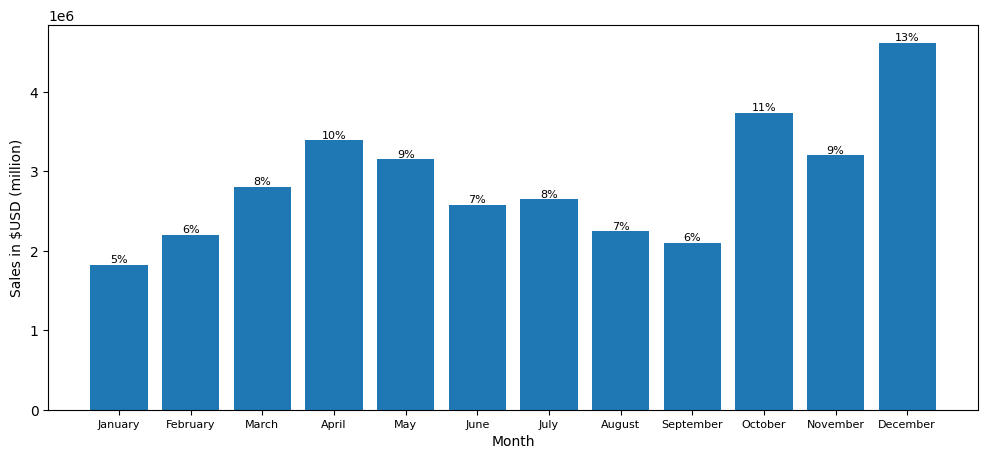

In [130]:
total_sales = monthly['sales'].sum()
percentage = (monthly['sales'] / total_sales) * 100

# Data Visualization
plt.figure(figsize=(12, 5))

# Bar plot
bars = plt.bar(monthly['month'], monthly['sales'])

# Add data labels with both values and percentages
for bar, value, percentage in zip(bars, monthly['sales'], percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'{percentage:.0f}%', ha='center', va='bottom', fontsize=8)

# Set labels and show the plot
plt.xticks(monthly['month'], size=8)
plt.xlabel('Month')
plt.ylabel('Sales in $USD (million)')
plt.show()

The highest sales occurred in December with sales amounting to 13% of all sales that occurred. This can happen because in December and when it coincides with Christmas, people buy products as Christmas gifts or as a self-reward for having had a good year, plus in December workers get end-of-year bonuses.

In [129]:
#Lest see, whats kind product is the highest sales in December
dec_monthly = df[df['month']==12].groupby('product')[['quantity', 'sales']].sum()
dec_monthly.sort_values(by='sales', ascending=False)
dec_monthly = dec_monthly.reset_index()
dec_monthly

,product,quantity,sales
0,20in Monitor,569,62584.31
1,27in 4K Gaming Monitor,864,336951.36
2,27in FHD Monitor,962,144290.38
3,34in Ultrawide Monitor,849,322611.51
4,AA Batteries (4-pack),3724,14300.16
5,AAA Batteries (4-pack),4241,12680.59
6,Apple Airpods Headphones,2076,311400.00
7,Bose SoundSport Headphones,1824,182381.76
8,Flatscreen TV,666,199800.00
9,Google Phone,715,429000.00


<ipython-input-122-0c344c3b776f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dec_monthly['product'], rotation='vertical')


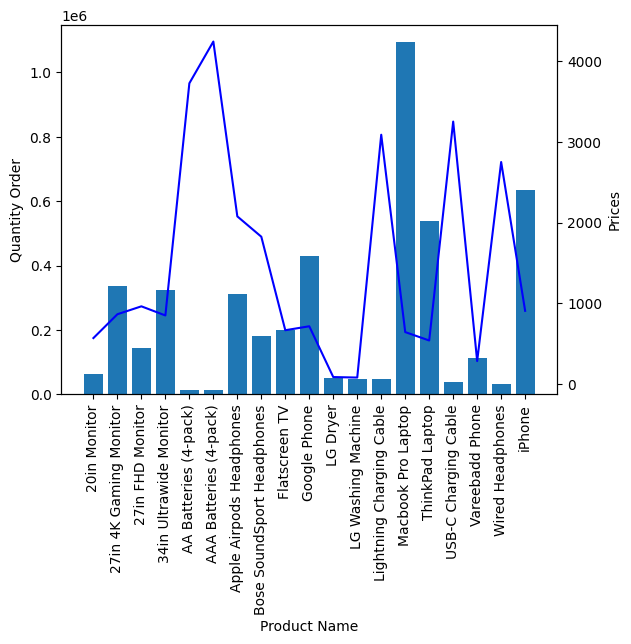

In [122]:
#visualization
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(dec_monthly['product'], dec_monthly['sales'])
ax2.plot(dec_monthly['product'], dec_monthly['quantity'], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order')
ax1.set_xticklabels(dec_monthly['product'], rotation='vertical')
ax2.set_ylabel('Prices')
plt.show()

Sales that occurred in December were dominated by high-value products such as MacBooks, iPhones and Lenovo Thinkpads. These items are included in the type of luxury goods. This proves that customers bought the product for self-reward that year or a special gift. But on the other hand, because December includes Christmas, sales of batteries and decorative lights also had an impact on the increase.

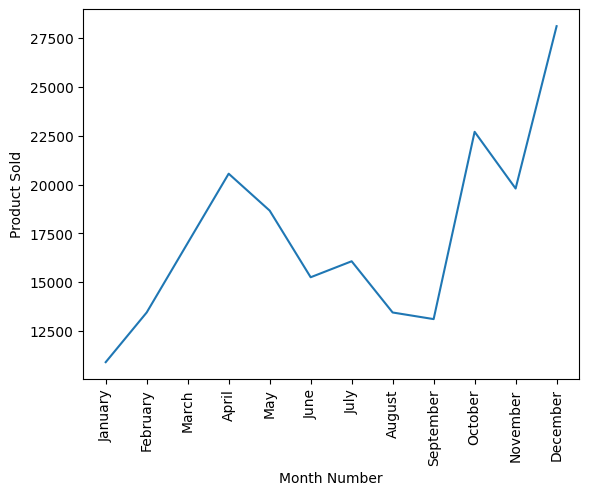

In [107]:
# Question 2 : How many product sold every month

#visualization
plt.plot(monthly['month'], monthly['quantity'])
plt.xticks(monthly['month'], rotation='vertical')
plt.ylabel('Product Sold')
plt.xlabel('Month Number')
plt.show()

In [132]:
#Question 3 : What state had the highest number of sales
states = df.groupby('state').sum()
states = states.reset_index()
states

<ipython-input-132-3c294ed87903>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states = df.groupby('state').sum()


,state,quantity,price,sales,month,year,hour
0,California,83528,13632896.97,13714774.71,523845,150086416,1070709
1,Georgia,16602,2779908.20,2795498.58,104794,30044739,214264
2,Maine,2750,447189.25,449758.27,17144,4956645,35211
3,Massachusetts,22528,3637409.77,3661642.01,141112,40246750,288225
4,New York,27932,4635370.83,4664317.43,175741,50224654,357696
5,Oregon,11303,1860558.22,1870732.34,70621,20210192,144421
6,Texas,27883,4562501.43,4587557.15,174449,49919779,356336
7,Washington,16553,2733296.01,2747755.48,104941,29743909,213292


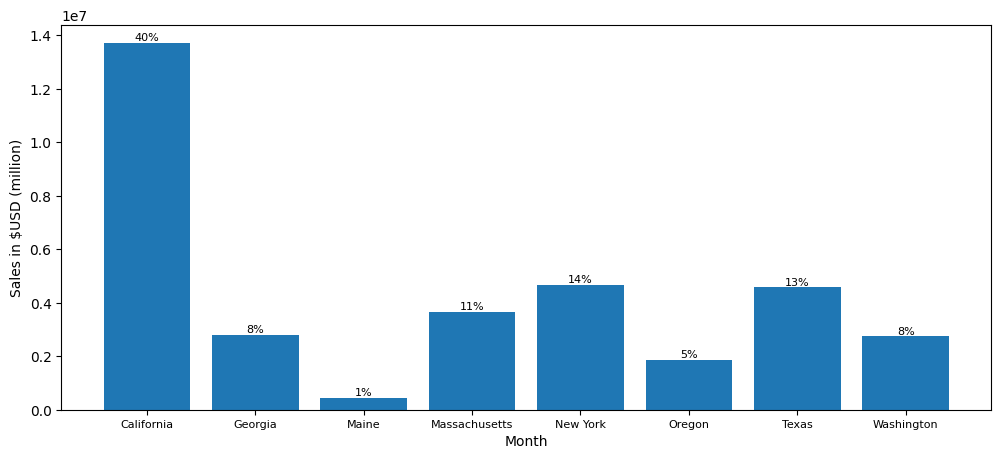

In [136]:
#visuzlization
stotal_sales = states['sales'].sum()
spercentage = (states['sales'] / stotal_sales) * 100

# Data Visualization
plt.figure(figsize=(12, 5))

# Bar plot
bars = plt.bar(states['state'], states['sales'])

# Add data labels with both values and percentages
for bar, value, percentage in zip(bars, states['sales'], spercentage):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'{percentage:.0f}%', ha='center', va='bottom', fontsize=8)

# Set labels and show the plot
plt.xticks(states['state'], size=8)
plt.xlabel('Month')
plt.ylabel('Sales in $USD (million)')
plt.show()

California is the state with the highest sales with 40% of the total sales of several states. This could happen because the California economy is the largest state economy in the United States, with a gross domestic product (GDP) worth $3.4 trillion in 2021. And i can assume that Maine state got lowest sales because The following data are the most current income statistics for Maine from the US Census Bureau, are in 2022 inflation adjusted dollars and are from the American Community Survey 2022 per Capita Income just $39,718.

In [166]:
#Question 4 : What time should we push our advertising to maximize our potential customers buying our product
hoursales = df.groupby('hour').sum()
hoursales = hoursales.reset_index()
hoursales

<ipython-input-166-0a322f966174>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hoursales = df.groupby('hour').sum()


,hour,quantity,price,sales,month,year
0,0,4428,709296.70,713721.27,27554,7894302
1,1,2619,458490.00,460866.88,16657,4744659
2,2,1398,233833.64,234851.44,8507,2509621
3,3,928,144726.42,145757.89,5904,1677792
4,4,937,162058.18,162661.01,6148,1724230
5,5,1493,229621.21,230679.82,9301,2667101
6,6,2810,445000.11,448113.00,17539,5011158
7,7,4556,740568.11,744854.12,28850,8098209
8,8,7002,1185970.62,1192348.97,43626,12630864
9,9,9816,1628498.49,1639030.58,60981,17662212


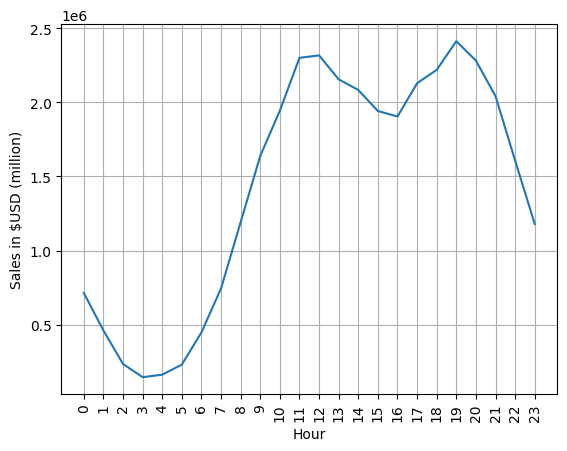

In [167]:
hours = [hour for hour, df in df.groupby('hour')]

plt.plot(hoursales['hour'], hoursales['sales'])
plt.xticks(hoursales['hour'], rotation='vertical')
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales in $USD (million)')
plt.show()

Highest order happend at 10,11,12 in afternoon and 18,19,20 at night. We can push our advertising at 10 o`clock to prepare our promotion and push it around 11 and 12 o'clock, this happend cause in that time is lunch time thats why in that time we got many orders and at 18,19,20 we can assume that can be happend cause in that time people back to home and when they rest they try to find something for their purpose.


In [168]:
#Question 5 : Whats product are most often sold together ?
df_c = df[df['order_id'].duplicated(keep=False)]
df_c['group'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))
df_c = df_c[['order_id','group']].drop_duplicates()
df_c

<ipython-input-168-c8efb230dd8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['group'] = df.groupby('order_id')['product'].transform(lambda x: ','.join(x))


,order_id,group
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"
...,...,...
186754,161920,"Google Phone,USB-C Charging Cable,AAA Batterie..."
186781,161945,"USB-C Charging Cable,34in Ultrawide Monitor"
186798,161960,"Vareebadd Phone,USB-C Charging Cable"
186811,161972,"Google Phone,USB-C Charging Cable"


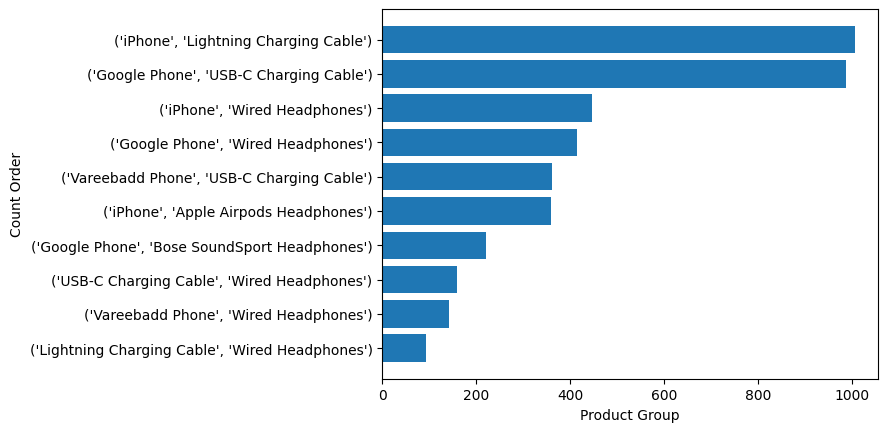

In [169]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_c['group']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

#for key, value in count.most_common(10):
#  print(key, value)

# Get the top 10 combinations and their counts
top_combinations = dict(count.most_common(10))

# Separate the combinations and counts for plotting
combinations, counts = zip(*top_combinations.items())

# Convert combinations to strings
combinations = [str(comb) for comb in combinations]

# Sort in descending order
combinations, counts = zip(*sorted(zip(combinations, counts), key=lambda x: x[1], reverse=False))


plt.barh(combinations, counts)
plt.xlabel('Product Group')
plt.ylabel('Count Order')
plt.show()

In this section, we can sell our products as a package to boost our sales. iPhones and Lightning cables are the two products that people buy the most. This means that when people buy an iPhone they also buy a Lightning cable, and when people buy a Google phone they also buy USB-C. To make it easier, we can sell them as one package, there are many reasons why we do this. and the important thing is that we can provide good customers so that they have a good feeling when buying in our market.

In [170]:
#Question 7 : What product sold most ? Why do you think it most ?

product_gr = df.groupby('product').sum()
product_gr = product_gr.reset_index()
product_gr

<ipython-input-170-6a5c5d028af9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_gr = df.groupby('product').sum()


,product,quantity,price,sales,month,year,hour
0,20in Monitor,4129,451068.99,454148.71,29336,8279921,58764
1,27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,12578371,90916
2,27in FHD Monitor,7550,1125974.93,1132424.50,52558,15156636,107540
3,34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,12479439,89076
4,AA Batteries (4-pack),27635,79015.68,106118.40,145558,41544963,298342
5,AAA Batteries (4-pack),31017,61716.59,92740.83,146370,41674182,297332
6,Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,31393435,223304
7,Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,26903178,192445
8,Flatscreen TV,4819,1440000.00,1445700.00,34224,9691201,68815
9,Google Phone,5532,3315000.00,3319200.00,38305,11154976,79479


In [171]:
prices = df.groupby('product')['price'].mean()
prices

product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price, dtype: float64

<ipython-input-172-4298e73e72a8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_gr['product'], rotation='vertical')


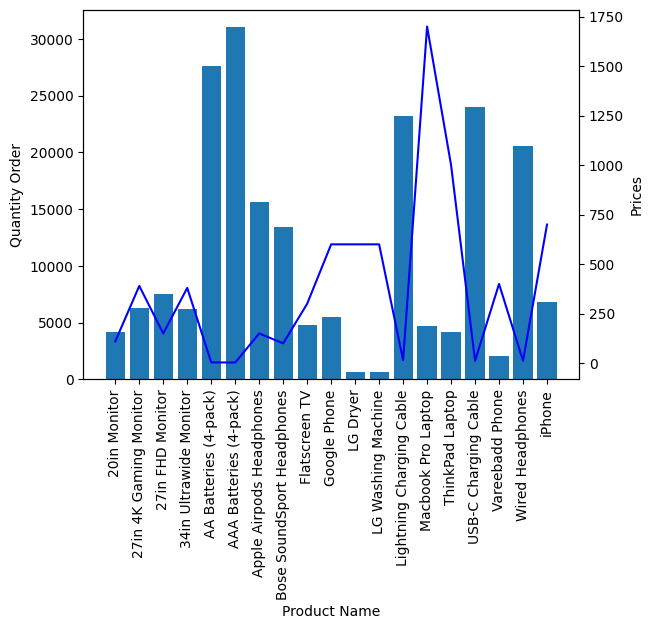

In [172]:
#visuzlization
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_gr['product'], product_gr['quantity'])
ax2.plot(product_gr['product'], prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order')
ax1.set_xticklabels(product_gr['product'], rotation='vertical')
ax2.set_ylabel('Prices')
plt.show()

AA Batteries and AAA batteries are the most products sold. Why can it happen? cause these products had low prices. If we compared to LG Dryer, LG Washing Machine these products had high prices and the product that is rarely purchased.

In [ ]:
#Cause of issue from delimeter decimal, i want to change the dot(.) from price and sales with coma (,)
df_test = df
df_test

,order_id,product,quantity,price,date,address,sales,month,year,day,hour,city,state
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,3,2019,28,20,Austin (TX),Texas
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,3,2019,28,20,Austin (TX),Texas
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",23.98,3,2019,28,20,Austin (TX),Texas
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,3,2019,17,5,San Francisco (CA),California
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,3,2019,10,0,San Francisco (CA),California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",150.00,2,2019,12,22,San Francisco (CA),California
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",5.98,2,2019,4,20,Los Angeles (CA),California
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",11.95,2,2019,24,6,Atlanta (GA),Georgia
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",11.95,2,2019,24,19,Dallas (TX),Texas


In [ ]:
#Cause when we want to change the delimeter, lets change datatype from price and sales
df_test['sales'] = df_test['sales'].astype('string')
df_test['price'] = df_test['price'].astype('string')
df_test

,order_id,product,quantity,price,date,address,sales,month,year,day,hour,city,state
0,162009,iPhone,1,"700,0",2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.0,3,2019,28,20,Austin (TX),Texas
1,162009,Lightning Charging Cable,1,"14,95",2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,3,2019,28,20,Austin (TX),Texas
2,162009,Wired Headphones,2,"11,99",2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",23.98,3,2019,28,20,Austin (TX),Texas
3,162010,Bose SoundSport Headphones,1,"99,99",2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,3,2019,17,5,San Francisco (CA),California
4,162011,34in Ultrawide Monitor,1,"379,99",2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,3,2019,10,0,San Francisco (CA),California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,"150,0",2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",150.0,2,2019,12,22,San Francisco (CA),California
186846,162005,AAA Batteries (4-pack),2,"2,99",2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",5.98,2,2019,4,20,Los Angeles (CA),California
186847,162006,USB-C Charging Cable,1,"11,95",2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",11.95,2,2019,24,6,Atlanta (GA),Georgia
186848,162007,USB-C Charging Cable,1,"11,95",2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",11.95,2,2019,24,19,Dallas (TX),Texas


In [ ]:
#change delimeter
df_test['sales'] = [x.replace('.', ',') for x in df['sales']]
df_test['price'] = [x.replace('.', ',') for x in df['price']]

In [ ]:
df_test.to_csv('fixed.csv', index=False)